In [1]:
%pylab inline

import torch
from torch.utils.data import IterableDataset
from torchvision import transforms
import webdataset as wds
from itertools import islice

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
url = "http://storage.googleapis.com/nvdata-openimages/openimages-train-000000.tar"
url = f"pipe:curl -L -s {url} || true"

repr() 函数

描述
repr() 函数将对象转化为供解释器读取的形式。

语法
以下是 repr() 方法的语法:

repr(object)
参数
object -- 对象。
返回值
返回一个对象的 string 格式。

In [6]:
dataset = wds.WebDataset(url)

for sample in islice(dataset, 0, 3):
    for key, value in sample.items():
        # print(key)
        print(key, repr(value)[:50])
    print()

__key__ 'e39871fd9fd74f55'
__url__ 'pipe:curl -L -s http://storage.googleapis.com/nvd
jpg b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01
json b'[{"ImageID": "e39871fd9fd74f55", "Source": "xcli

__key__ 'f18b91585c4d3f3e'
__url__ 'pipe:curl -L -s http://storage.googleapis.com/nvd
jpg b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00
json b'[{"ImageID": "f18b91585c4d3f3e", "Source": "acti

__key__ 'ede6e66b2fb59aab'
__url__ 'pipe:curl -L -s http://storage.googleapis.com/nvd
jpg b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00
json b'[{"ImageID": "ede6e66b2fb59aab", "Source": "acti



##### islice使用

python中itertools.islice的用法

reference:

(link)[https://www.jianshu.com/p/4e0344191895]

itertools.islice的基本用法为：
itertools.islice(iterable, start, stop[, step])
可以返回从迭代器中的start位置到stop位置的元素。如果stop为None，则一直迭代到最后位置。


In [18]:
 from itertools import islice
 islice('ABCDEFG', 2)

In [19]:
islice('ABCDEFG', 2, 4)

In [20]:
for it in islice('ABCDEFG', 2, 4):
    print(it)

C
D


##### dataset

In [2]:
import matplotlib.pyplot as plt

In [3]:
dataset = wds.WebDataset(url).shuffle(100).decode("rgb").to_tuple("jpg;png","json")

NameError: name 'url' is not defined

(731, 1024, 3) float32 <class 'list'>
3
[{'ImageID': 'e0754673b320c917', 'Source': 'xclick', 'LabelName': '/m/0463sg', 'Confidence': '1', 'XMin': '0.428750', 'XMax': '0.568125', 'YMin': '0.107706', 'YMax': '0.331874', 'IsOccluded': '0', 'IsTruncated': '0', 'IsGroupOf': '0', 'IsDepiction': '0', 'IsInside': '0'}, {'ImageID': 'e0754673b320c917', 'Source': 'xclick', 'LabelName': '/m/05s2s', 'Confidence': '1', 'XMin': '0.000000', 'XMax': '0.999375', 'YMin': '0.000000', 'YMax': '0.889667', 'IsOccluded': '1', 'IsTruncated': '1', 'IsGroupOf': '1', 'IsDepiction': '0', 'IsInside': '0'}, {'ImageID': 'e0754673b320c917', 'Source': 'xclick', 'LabelName': '/m/05s2s', 'Confidence': '1', 'XMin': '0.676250', 'XMax': '0.998125', 'YMin': '0.649737', 'YMax': '0.912434', 'IsOccluded': '1', 'IsTruncated': '1', 'IsGroupOf': '0', 'IsDepiction': '0', 'IsInside': '0'}]


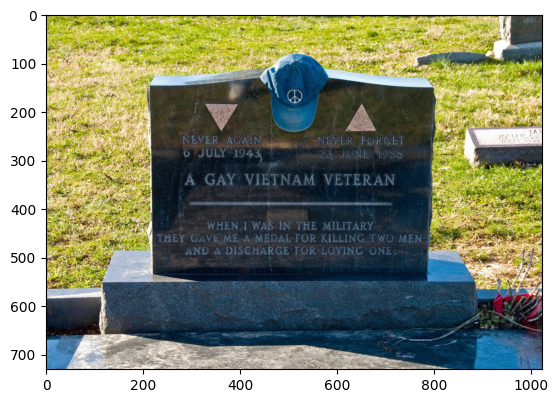

In [10]:
for image, data in islice(dataset,0,3):
    print(image.shape, image.dtype, type(data))
    print(len(data))
    print(data)
    plt.imshow(image)
    break

In [11]:
dataset

In [12]:
for image,data in dataset:
    print(image.shape)
    print(type(image))
    print(data)
    break

(683, 1024, 3)
<class 'numpy.ndarray'>
[{'ImageID': 'f1945ddd8db9784e', 'Source': 'xclick', 'LabelName': '/m/0k4j', 'Confidence': '1', 'XMin': '0.281250', 'XMax': '0.633750', 'YMin': '0.385553', 'YMax': '0.797373', 'IsOccluded': '0', 'IsTruncated': '0', 'IsGroupOf': '0', 'IsDepiction': '0', 'IsInside': '0'}]


#### my local dataset

In [4]:
import os

the_path = os.path.join("/remote-home/songtianwei/temp","39785.tar")

In [5]:
from torchvision import transforms

def identity(sample):
    # print(sample)
    return sample[0]

preproc = transforms.Compose([
    # transforms.RandomResizedCrop(224),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])


In [15]:
dataset = (wds.WebDataset(the_path)
           .shuffle(100)
           .decode('rgb')
           .to_tuple("ori_img.npy","text")
           .map_tuple(preproc, identity)
           .batched(256)
          )

In [16]:
dataset

In [17]:

for image, text in islice(dataset, 0, 3):
    print(image.shape, image.dtype)
    print(text, type(text))

torch.Size([256, 3, 256, 256]) torch.float32
['"', 'M', 'W', 'R', 'P', 'C', 'M', 'H', 'P', 'A', 'N', 'A', '"', 'L', 'G', 'L', 'a', '2', 'T', 'T', 'M', 'I', 'C', 'P', 'G', 'C', 'H', 'C', 'A', 'A', 'O', 'M', 'S', 'F', 'W', 'S', '"', '1', 'T', 'L', 'F', 'L', 'C', 'A', 'F', 'P', '3', 'T', 'I', 'D', 'S', 'H', '"', 'H', 'I', 'C', 'r', 'E', '3', 'y', 'D', 'M', 'D', '2', 'T', 'R', 'A', 'J', 'L', 'P', 'V', 'L', 'A', 'D', 'X', 'a', 'P', 'C', '1', 'T', 'W', 'Ш', 'J', 'D', '"', 'S', 'S', 'D', 'C', 'p', 'B', 'A', 'C', 'B', 'H', 'S', 'K', 'F', 'T', 'M', '©', 'P', 'T', '"', 'T', 'R', 'T', 'P', 'D', 'W', '©', 's', 'M', 'M', 'A', 'H', 'P', 'R', 'F', 'M', '3', 'b', '2', 'C', 'P', 'V', 'T', 'T', 'E', 'G', 'F', 'R', 'T', 'C', 'S', 'S', 'P', '"', 'G', 'H', 'J', 'P', 'N', 'B', 'C', 'Y', 'M', 'S', 'g', 'S', 'S', 'W', 'S', 'T', 'p', 'M', 'Y', 'S', 'K', '1', 'F', 'A', 'k', 'S', 'M', 'k', '"', 'W', 'L', 'E', 'V', '<', 'T', 'S', 'F', 'H', 'I', 'W', 'D', '"', 'B', 'K', 'F', 'g', 'C', 'm', 'O', 'D', 'H', 'G', 'I',

In [9]:
# for data in dataset:
#     print(data.keys())
#     info = data["json"]
#     print(data["text"])
#     print(type(info))
#     print("info keys",info.keys())
#     ori_img_np_arr = data["ori_img.npy"]
    
#     plt.figure()
#     plt.subplot(1,2,1)
#     plt.imshow(ori_img_np_arr)
#     sd_img_gen_arr = data['sdgen_img.npy']
#     plt.subplot(1,2,2)
#     plt.imshow(sd_img_gen_arr)
#     break

In [11]:
def collate_fn(sample):
    pass

In [10]:
batch_size = 20
dataloader = torch.utils.data.DataLoader(dataset.batched(batch_size), num_workers=4, batch_size=None)
images, targets = next(iter(dataloader))
print(images.shape)
print(targets)

torch.Size([20, 3, 256, 256])
['P', 'M', 'T', 'T', 'B', 'S', 'Ш', 's', 'H', '"', 'J', 'S', 'M', 'L', 'P', 'F', 'T', 'N', 'L', 'W']


In [18]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

In [19]:
inputs

{'input_ids': tensor([[49406,   320,  1125,   539,   320,  2368, 49407],
        [49406,   320,  1125,   539,   320,  1929, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[ 0.5873,  0.5873,  0.6165,  ...,  0.0617,  0.0471, -0.0259],
          [ 0.5727,  0.5727,  0.6603,  ...,  0.1201,  0.0763,  0.0909],
          [ 0.5873,  0.5435,  0.6165,  ...,  0.0325,  0.1201,  0.0617],
          ...,
          [ 1.8719,  1.8573,  1.8719,  ...,  1.3902,  1.4340,  1.4194],
          [ 1.8281,  1.8719,  1.8427,  ...,  1.4486,  1.4340,  1.5070],
          [ 1.8573,  1.9011,  1.8281,  ...,  1.3756,  1.3610,  1.4486]],

         [[-1.3169, -1.3019, -1.3169,  ..., -1.4970, -1.4369, -1.4820],
          [-1.2418, -1.2718, -1.2268,  ..., -1.4369, -1.4669, -1.4519],
          [-1.2568, -1.3169, -1.2268,  ..., -1.4669, -1.4069, -1.4519],
          ...,
          [ 0.1239,  0.1089,  0.1239,  ..., -0.7016, -0.6865, -0.6865],
          [ 0.07

In [21]:
model??

Signature:      model(*args, **kwargs)
Type:           CLIPModel
String form:   
CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=